Then, include in your report a single plot with two lines:
* (a) Hard Parzen window’s classification error on the validation set of
iris dataset, when trained on the training set (see question 4) for
the following values of h:
h ∈ {0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 3.0, 10.0, 20.0}
* (b) RBF Parzen’s classification error on the validation set of iris
flower, when trained on the training set (see question 4) for the
following values of σ:
σ ∈ {0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 3.0, 10.0, 20.0}
The common x-axis will represent either h or σ. Always label your
axes and lines in the plot!
Give a detailed discussion of your observations.


Question 5

In [70]:
import numpy as np

import matplotlib.pyplot as plt
from solution import split_dataset, ErrorRate, random_projections, HardParzen, SoftRBFParzen

In [71]:
iris = np.genfromtxt("iris (1).txt")

In [72]:
train_set , valid_set , test_set = split_dataset(iris)

train_x = train_set[:, :-1]
train_y = train_set[:, -1]

valid_x = valid_set[:, :-1]
valid_y = valid_set[:, -1]

test_x = test_set[:, :-1]
test_y = test_set[:, -1]

# h and sigma values
h = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 3.0, 10.0, 20.0]
sigma = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 3.0, 10.0, 20.0]

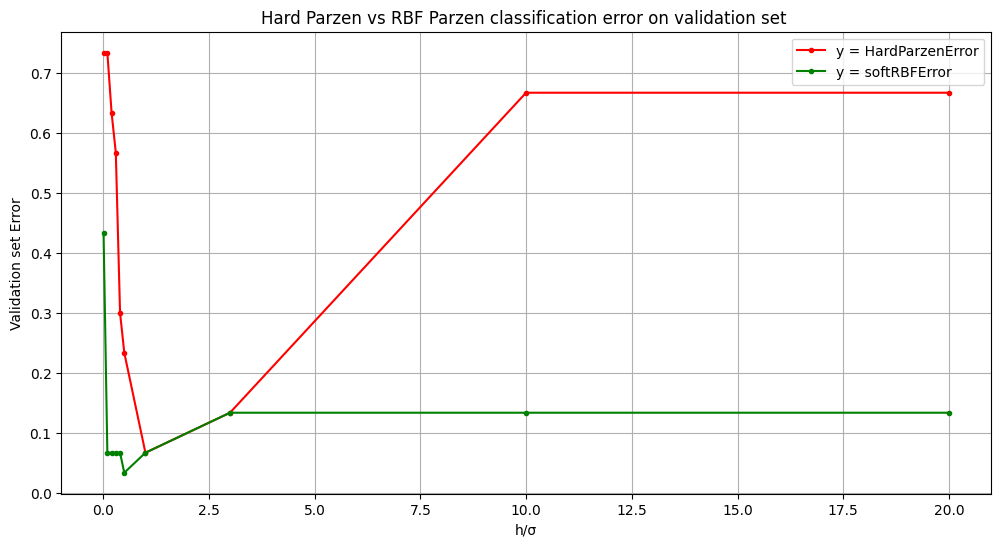

In [75]:
error_valid = ErrorRate(train_x , train_y , valid_x , valid_y)
#Hard Parzen window’s classification error on the validation set
hard_parzen_error = np.array([error_valid.hard_parzen(i) for i in h])
#RBF Parzen’s classification error on the validation set
softRBF_error = np.array([error_valid.soft_parzen(j) for j in sigma])

#Single plot with two lines
plt.figure(figsize=(12, 6))
plt.plot(h, hard_parzen_error, color='red', marker=".")
plt.plot(sigma, softRBF_error, color='green', marker=".")
plt.xlabel('h/σ')
plt.ylabel('Validation set Error')
plt.legend(['y = HardParzenError', 'y = softRBFError'])
plt.title('Hard Parzen vs RBF Parzen classification error on validation set ')
plt.grid(True)
plt.show()
     

In [74]:
print("Error values for Hard Parzen:")
print("highest validation error from hard parzen: ",max(hard_parzen_error))
print("lowest validation error from hard parzen: ",min(hard_parzen_error))
print("average validation error from hard parzen: ",hard_parzen_error.mean())
print("standard deviation of validation error from hard parzen: ",hard_parzen_error.std())

print("---")
print("Error values for Soft Parzen:")
print("highest validation error from RBF parzen: ",max(softRBF_error))
print("lowest validation error from RBF parzen: ",min(softRBF_error))
print("average validation error from RBF parzen: ",softRBF_error.mean())
print("standard deviation of validation error from hard parzen: ",softRBF_error.std())



Error values for Hard Parzen:
highest validation error from hard parzen:  0.7333333333333333
lowest validation error from hard parzen:  0.06666666666666667
average validation error from hard parzen:  0.47333333333333333
standard deviation of validation error from hard parzen:  0.24756592836836186
---
Error values for Soft Parzen:
highest validation error from RBF parzen:  0.43333333333333335
lowest validation error from RBF parzen:  0.03333333333333333
average validation error from RBF parzen:  0.12
standard deviation of validation error from hard parzen:  0.10974718422102886


##### Key Observations:

* Overall Performance:
    * The soft RBF Parzen generally outperforms Hard Parzen, showing lower classification error across most h/σ values.
    * The soft RBF Parzen has a lower average error (0.12) compared to Hard Parzen (0.47).
    * The soft RBF Parzen also has a lower standard deviation (0.11) than Hard Parzen (0.25), paired with the graph, it clearly indicates that the soft RBF Parzen has more consistent performance across different parameter values.
* Error Range:
    * Hard Parzen: Error ranges from 0.067 to 0.733
    * RBF Parzen: Error ranges from 0.033 to 0.433
    * RBF Parzen has both a lower minimum error and a lower maximum error.
* Sensitivity to Parameter Changes:
    * Hard Parzen shows high sensitivity to h values:
        * Very low h (0.01) results in high error (over 0.7), and high h ( greater than 3) results in high error as well
        * Error decreases rapidly as h increases to about 0.1-0.2
        * Error increases again for h values above ~2.5, stabilizing at a high error rate (about 0.67) for large h values
    * RBF Parzen shows more stable performance across σ values:
        * High error for very low σ (0.01)
        * Quickly reaches and maintains low error for σ values between 0.1 and 3.0
        * Slight increase in error for larger σ values (greater than 3)

* Optimal Parameter Ranges:
    * Both the Hard Parzen and Soft RBF Parzen perform best with the parameters h/σ between 0.1 to about 3. However, note that the RBF Parzen generally performs better in this range and starts to perform well at smaller parameter values than the Hard Parzen (0.1 vs ~0.4-0.5).
* Behavior at the Extremes:
    * From the chart we can see that both classifiers generally have poor performances at the extremes.
    * Both the Hard Parzen and soft Parzen perform poorly with very small parameter values (0.01)
    * The Hard Parzen's performance decreases (gets worse) significantly for large h values, meanwhile
    * RBF Parzen maintains better performance even with large σ values

##### Discussion:
In general, we can see that the sot RBF parzen window classifier demonstrated bettre and more robust performance accross a range of parameters compared to the Hard Paren window using this data. This can likely be due to the smoother decision boundaries that the RBF Kernel creats, allowing for better generalization. 

Due to the Soft RBF classifiers performance being more stable across the range of paramets, it is likely an easier function to use in practice, and requires less efforts in hyperparameter tuning than the Hard Parzen. 

Note that we observed both models experienceing bad performance at the extremely small parameter value (0.01), which is due to overfitting the training data. 

So, in conclusion, the soft RBF parzen classifier is the model with a more consistent and better performance.

7. [5 points]
Question. Include in your report a discussion on the running time
complexity of these two methods. How does it vary for each method
when the hyperparameter h or σ changes? Why ?


#### Time complexity:
1. Hard Parzen Window:
    * Fitting:
        * For the fitting process, the implimentation stores the training data, which is O(1) since no processing is done other than storing it.
    * Prediction: 
        * Here we calculate the manhattan distance between the test point and all other points in training. This operation takes O(d), and doing this n times for the n training points makes it O(n*d)
        * We then find all the neighbours with a distance less than h. This is O(n) since we compare each distance to h.
        * Finally, we count the class labels and select the most frequent one. This is also O(n) in the worst case when all training points are neighbours.
    * Thus the complexity for this is O(n*d) per test point t, thus we multiply it t time, giving O(n*d*t)
    
    * Effect of h:
        * As h increases, the number of neighbours considered for every prediction increases too. For small values of h, only points that are close are included in the neighbourhood, so there are fewer points to classify reducing the computation per test point. For larger h, almost all the points can be considered as neighbours, resulkting in higher number of computations to determine the most frequent label. However, the core of the complexity remains the same, as h affects te constant factor. So, the values of h will not have an efffect on the time complexity.

2. Soft RBF Parzen Window:
* Fitting:
    * Similar to hard parzen, only involves storing data so it is O(1)
* Prediciton:
    * For each ppoint calculate the manhattan distance between all points and test point, taking O(n*d)
    * Then we apply the RBF Kernel. This takes O(n) since we apply the kernel to each n training points.
    * Then for each training point, we accumulatre the weighted counts for each class, taking O(n) in worst case.
* Thus the total time complexity is O(n*d) for each test point, and similar to before that means O(n*d*t), but with the added cost of applying the RBF Kernel.
* Effect of σ:
    * The σ parameter doesn't affect the time complexity directly, as all training points are considered for each test point regardless of σ. A small sigma gives us more influence for each training point, where the kernel gives a significant weigfht only to points close to the test point. This reduces the number of points contributing to the classification, slightly reducing the computaitonal cost in the real world. For large sigma, the RBF kernel is more spread out, so almost all training points contribute to the classification, which increases the number of contributing points and the computarional cost in the real world. however, theoretically, the sigma only affects the constant factor like in Hard parzem, thus not affecting the overall complexity. So while theoretically, the runtime is the same, in the real world the size of sigma will affect the runtimes.

9. [10 points]
Question. Similar to Question 5, compute the validation errors of
Hard Parzen classifiers trained on 500 random projections of the training set, for
h ∈ {0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 3.0, 10.0, 20.0}

* The validation errors should be computed on the projected validation
set, using the same matrix A. To obtain random projections, you may
draw A as 4 independent variables drawn uniformly from a Gaussian
distribution of mean 0 and variance 1.
* You can for example store these validation errors in a 500×10 matrix,
with a row for each random projection and a column for each value of
h.
* Do the same thing for RBF Parzen classifiers, for
σ ∈ {0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 3.0, 10.0, 20.0}
* Plot and include in your report in the same graph the average values
of the validation errors (overall random projections) for each value of
h and σ, along with error bars of length equal to 0.2× the standard
deviations.
How do your results compare to the previous ones?


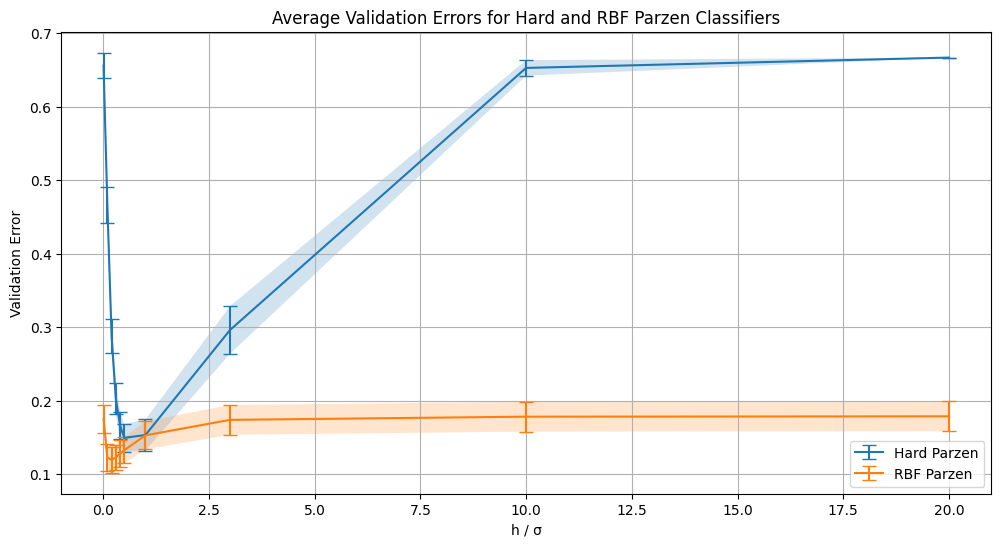

In [63]:
import numpy as np
import matplotlib.pyplot as plt

def compute_projection_errors(iris, num_projections=500):
    train, val, test = split_dataset(iris)
    
    h_values = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 3.0, 10.0, 20.0]
    sigma_values = h_values.copy()
    
    hard_parzen_errors = np.zeros((num_projections, len(h_values)))
    rbf_parzen_errors = np.zeros((num_projections, len(sigma_values)))
    
    for i in range(num_projections):
        # Generate random projection matrix
        A = np.random.normal(0, 1, (4, 2))
        
        # Project data
        train_projected = random_projections(train[:, :-1], A)
        val_projected = random_projections(val[:, :-1], A)
        
        error_rate = ErrorRate(train_projected, train[:, -1], val_projected, val[:, -1])
        
        # Compute errors for Hard Parzen
        for j, h in enumerate(h_values):
            hard_parzen_errors[i, j] = error_rate.hard_parzen(h)
        
        # Compute errors for RBF Parzen
        for j, sigma in enumerate(sigma_values):
            rbf_parzen_errors[i, j] = error_rate.soft_parzen(sigma)
    
    return hard_parzen_errors, rbf_parzen_errors, h_values, sigma_values

def plot_projection_errors(hard_parzen_errors, rbf_parzen_errors, h_values, sigma_values):
    hard_mean = np.mean(hard_parzen_errors, axis=0)
    hard_std = np.std(hard_parzen_errors, axis=0)
    rbf_mean = np.mean(rbf_parzen_errors, axis=0)
    rbf_std = np.std(rbf_parzen_errors, axis=0)
    hard_error = 0.2*hard_std
    rbf_error = 0.2*rbf_std

    plt.figure(figsize=(12, 6))
    plt.errorbar(h_values, hard_mean, yerr=hard_error, label='Hard Parzen', capsize=5)
    plt.errorbar(sigma_values, rbf_mean, yerr=rbf_error, label='RBF Parzen', capsize=5)
    plt.xlabel('h / σ')
    plt.ylabel('Validation Error')
    plt.fill_between(h_values, hard_mean-hard_error, hard_mean+hard_error, alpha=0.2)
    plt.fill_between(sigma_values, rbf_mean-rbf_error, rbf_mean+rbf_error, alpha=0.2)
    plt.title('Average Validation Errors for Hard and RBF Parzen Classifiers')
    plt.legend()
    plt.grid(True)
    plt.show()

hard_parzen_errors, rbf_parzen_errors, h_values, sigma_values = compute_projection_errors(iris)
plot_projection_errors(hard_parzen_errors, rbf_parzen_errors, h_values, sigma_values)

This new graph is very similar to the one in question 5, and in fact has simialr trends. 
However, some key improvements is that the soft Parzen is more robust this time and does not have as much vairance or high error for very low values of sigma. Furthermore, the range of optimal vaues of paramters might have slighty imporved. The biggest change is that the vlaidation error for the soft RBF parzen is now very low from the beginning and stays that way the whole time.